## Exploratory Data Analysis

## Description:
We are provided with general information about clients (age, job, etc.) as well as more specific information about the current insurance sell campaign (communication, last contact day) and previous campaigns (attributes like previous attempts, outcome).
You have data about 4000 customers who were contacted during the last campaign and for
whom the results of campaign (did the customer buy insurance or not) are known. Let us build
machine learning model to help NationWide.

## Task and Approach: 
The task is to predict for 1000 customers who were contacted during the current campaign,
whether they will buy car insurance or not.
We will be using logistic Regression to predict it

### Import

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Get Data

In [56]:
data = pd.read_csv('car_insurance_campaign_data.csv')
data.head()

,Age,Annual_Income,Married,Previous_Policies,Contacted_Recently,Current_Policy_Duration,Buy_Insurance
0,56,82292,1,1,0,1,0
1,69,43833,1,3,0,7,0
2,46,24158,0,1,0,1,0
3,32,82680,1,1,1,1,0
4,60,40309,1,0,1,3,1


### Note: The target is a binary classification problem:

Target Variable: Whether the customer buys car insurance or not (Yes/No or 1/0).
We aim to use Logistic Regression to model this relationship.

### Check for Missing Value

In [59]:
print(data.isnull().sum())


Age                        0
Annual_Income              0
Married                    0
Previous_Policies          0
Contacted_Recently         0
Current_Policy_Duration    0
Buy_Insurance              0
dtype: int64


### Convert Categorical Variables to Numeric:

In [70]:
data = pd.get_dummies(data, drop_first=True)
data

,Age,Annual_Income,Married,Previous_Policies,Contacted_Recently,Current_Policy_Duration,Buy_Insurance
0,56,82292,1,1,0,1,0
1,69,43833,1,3,0,7,0
2,46,24158,0,1,0,1,0
3,32,82680,1,1,1,1,0
4,60,40309,1,0,1,3,1
...,...,...,...,...,...,...,...
995,18,90981,0,3,1,9,0
996,35,96242,1,1,1,7,1
997,49,67517,0,0,0,2,0
998,64,49257,1,1,0,8,0


### split Dataset

In [80]:
X = data.drop('Buy_Insurance', axis=1)
y = data['Buy_Insurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Train Logistic Regression Model

In [84]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [86]:
print(model.coef_)
print(model.intercept_)


[[ 0.5844628   0.65721496  2.52703052 -1.43956342  2.51321779  0.89153627]]
[-6.47297365]


### Evaluate The Model

#### Confusion Matrix:

In [90]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))


[[272   6]
 [  7  15]]


#### Classification Report:

In [92]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       278
           1       0.71      0.68      0.70        22

    accuracy                           0.96       300
   macro avg       0.84      0.83      0.84       300
weighted avg       0.96      0.96      0.96       300



#### Accuracy:

In [94]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9566666666666667


### Heatmap for Confusion Mattrix

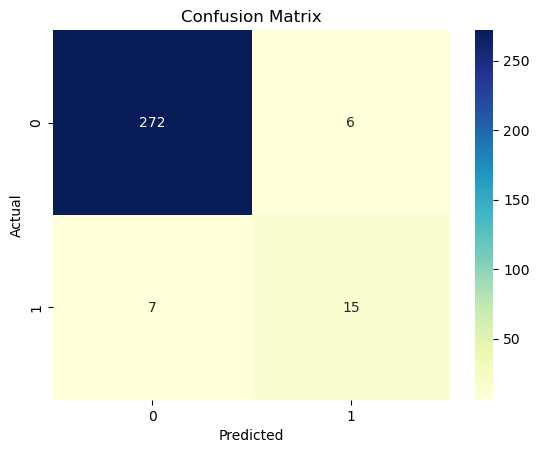

In [144]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Probability Predication

#### The Number of customers Predicted to Buy Car Insurance:

In [109]:
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of buying
y_pred = (y_proba >= 0.5).astype(int)        # Threshold classification
num_buyers = sum(y_pred)

print(f"Number of customers predicted to buy car insurance: {num_buyers}")


Number of customers predicted to buy car insurance: 21


#### AUC-ROC Score:

In [103]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_score = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC Score: {auc_score}')


AUC-ROC Score: 0.9857750163505559


### Prediction Through Seaborn

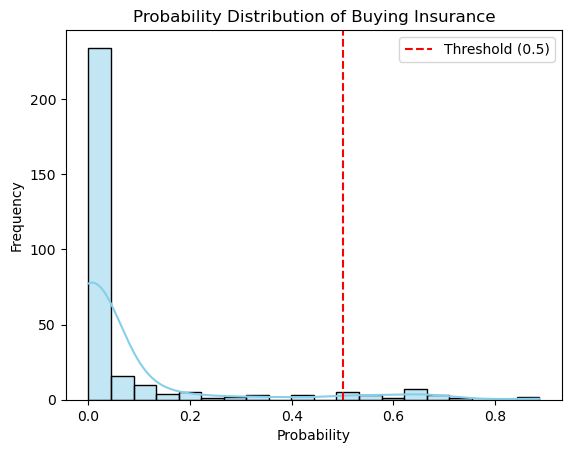

In [141]:
sns.histplot(y_proba, kde=True, bins=20, color='skyblue')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.title('Probability Distribution of Buying Insurance')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Count of Buyers vs Non-Buyers

C:\Users\karan\AppData\Local\Temp\ipykernel_6760\2104976862.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prediction_counts.index, y=prediction_counts.values, palette="pastel")


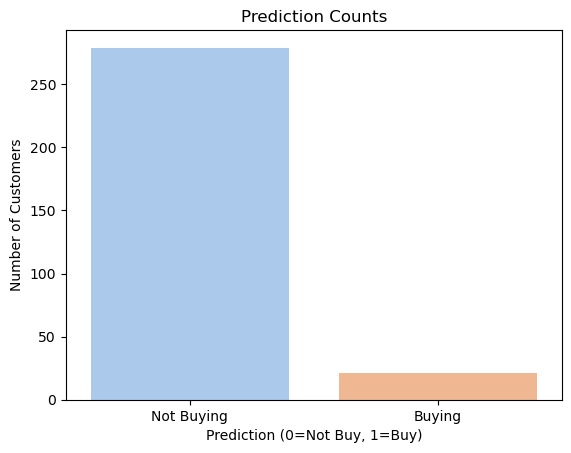

In [149]:

prediction_counts = pd.Series(y_pred).value_counts()

sns.barplot(x=prediction_counts.index, y=prediction_counts.values, palette="pastel")
plt.title('Prediction Counts')
plt.xlabel('Prediction (0=Not Buy, 1=Buy)')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Not Buying', 'Buying'])
plt.show()


### Deployment

In [107]:
import joblib
joblib.dump(model, 'logistic_model.pkl')


['logistic_model.pkl']

### Coefficients from Logistic Regression

In [116]:

import pandas as pd
feature_names = X.columns
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importance)


                   Feature  Coefficient
2                  Married     2.527031
4       Contacted_Recently     2.513218
5  Current_Policy_Duration     0.891536
1            Annual_Income     0.657215
0                      Age     0.584463
3        Previous_Policies    -1.439563


### Odds Ratios

In [120]:
import numpy as np

feature_importance['Odds Ratio'] = np.exp(feature_importance['Coefficient'])
print(feature_importance)


                   Feature  Coefficient  Odds Ratio
2                  Married     2.527031   12.516284
4       Contacted_Recently     2.513218   12.344589
5  Current_Policy_Duration     0.891536    2.438874
1            Annual_Income     0.657215    1.929411
0                      Age     0.584463    1.794027
3        Previous_Policies    -1.439563    0.237031


### Checking Assumption With Data Analysis

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                   Feature       VIF
0                      Age  5.535465
1            Annual_Income  4.984468
2                  Married  1.945990
3        Previous_Policies  2.868927
4       Contacted_Recently  1.898397
5  Current_Policy_Duration  3.895747


### Conclusion
 The task is to predict for 1000 customers who were contacted during the current campaign,
whether they will buy car insurance or not with help of logistic Regression and we come to conlcusion or answer is that out of 1000 customers only 21 customers are going to buy car insurance 